# Modelado inverso de ERT

## Caso 2

In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [14]:
import pygimli as pg

In [15]:
from pygimli.physics import ert

In [34]:
data = ert.load("Datos_reales_2aTa.txt")

In [35]:
print(data)

Data: Electrodes: 81 data: 944


In [36]:
data["k"] = ert.geometricFactors(data)

In [37]:
data["k"]

944 [251.32741228718345,...,251.32741228718345]

In [38]:
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)

15/02/24 - 11:28:09 - pyGIMLi - CRITICAL - None.estimateError(c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\pygimli\physics\ert\ert.py:500)
We need apparent resistivity values (rhoa) in the data to estimate a data error.


Exception: We need apparent resistivity values (rhoa) in the data to estimate a data error.

### Cálculo de resistividad aparente

In [39]:
data["rhoa"] = data("k") * data("r")

In [40]:
data["rhoa"]

944 [2.1513626491782905,...,1.9968993348607103]

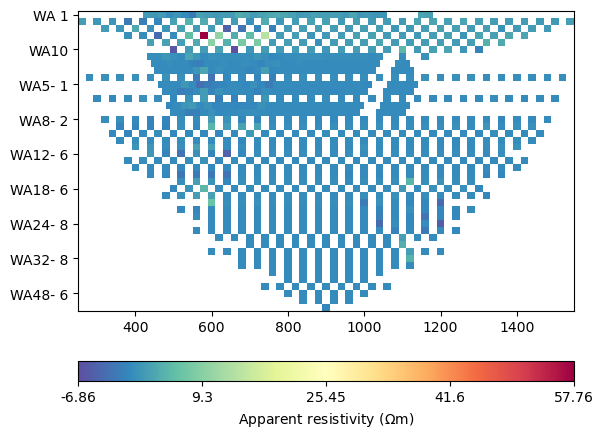

In [41]:
ax, cb = ert.show(data)

In [42]:
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)

In [43]:
data["err"]

944 [0.020002324108397956,...,0.02000250388184958]

In [44]:
mgr = ert.ERTManager(data, verbose=True)

In [45]:
inv = mgr.invert(verbose=True) #El error de la inversión es porque tenemos valores negativos en la resistividad aparente

15/02/24 - 11:28:57 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 11:28:57 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 11:28:57 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 11:28:57 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 11:28:57 - pyGIMLi - WARNING - Found negative apparent resistivities. These can't be processed with logarithmic data transformation. You should consider to filter them out using data.remove(data['rhoa'] < 0).
15/02/24 - 11:28:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/02/24 - 11:28:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/02/24 - 11:28:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3412 Cells: 6412 Boundaries: 5014
15/02/24 - 11:28:58 - pyGIMLi - INFO - Use median(data values)=0.08074081615284985
15/02/24 - 11:28:58 - pyGIMLi - INFO - Created startmodel from forward operator: 1275, min/max=0.

fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001DC5EF374A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001DC5EF37590>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001DC5EF37540>
min/max (data): -6.86/57.76
min/max (error): 2%/6.9%
min/max (start model): 0.08/0.08
--------------------------------------------------------------------------------


RuntimeError: ./core/src/inversion.cpp:95		double GIMLI::RInversion::getPhiD(const Vec&) const  getPhiD == nan

### Manejo de valores negativos y control de calidad

In [17]:
import seaborn as sns
import pandas as pd

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

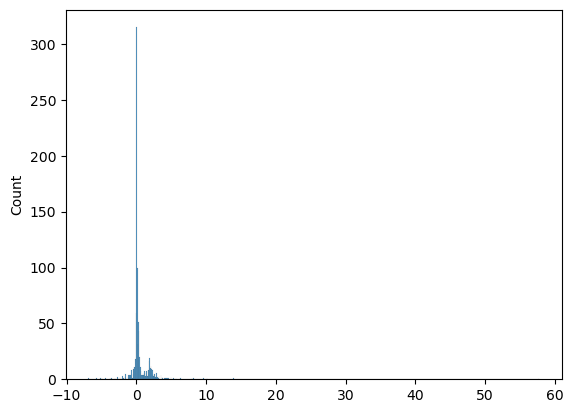

In [46]:
sns.histplot(data["rhoa"])

In [47]:
data.remove(data["rhoa"] < 0)

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

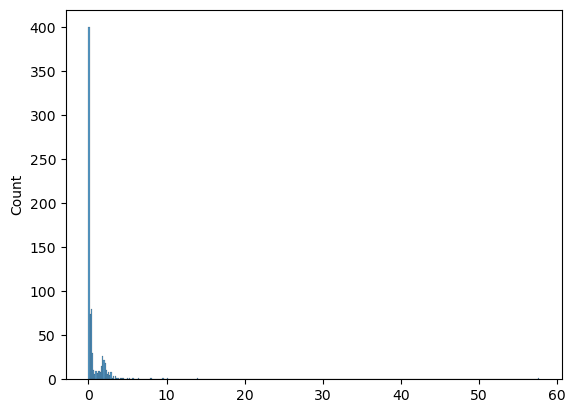

In [48]:
sns.histplot(data["rhoa"])

In [49]:
data_array = np.array(data["rhoa"])

In [50]:
data_series = pd.Series(data_array)

In [51]:
quantile_99 = data_series.quantile(0.99)

In [52]:
quantile_99

5.3424791180318705

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

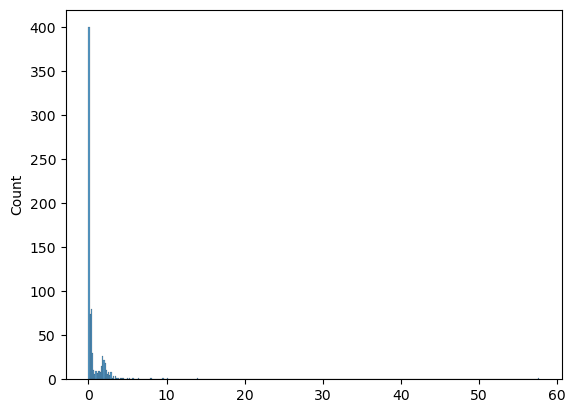

In [53]:
sns.histplot(data["rhoa"])

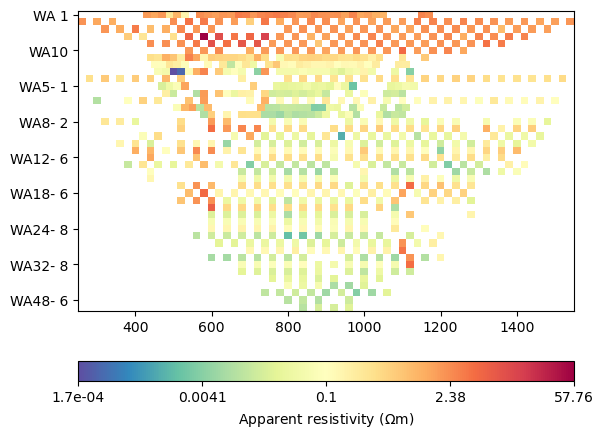

In [54]:
ax, cb = ert.show(data) #Para analizar

### Intento de Inversión 2, Valores muy pequeños afectan la inversión

In [55]:
mgr = ert.ERTManager(data, verbose=True)

In [56]:
inv = mgr.invert(verbose=True)

15/02/24 - 11:37:09 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 11:37:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 11:37:09 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 11:37:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 11:37:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/02/24 - 11:37:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/02/24 - 11:37:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3412 Cells: 6412 Boundaries: 5014
15/02/24 - 11:37:09 - pyGIMLi - INFO - Use median(data values)=0.14558140356735103
15/02/24 - 11:37:09 - pyGIMLi - INFO - Created startmodel from forward operator: 1275, min/max=0.145581/0.145581
15/02/24 - 11:37:09 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001DC709313B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001DC70931400>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001DC70931310>
min/max (data): 1.7e-04/57.76
min/max (error): 2%/4.99%
min/max (start model): 0.15/0.15
--------------------------------------------------------------------------------


15/02/24 - 11:37:18 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


inv.iter 0 ... chi² = 8772.07
--------------------------------------------------------------------------------
inv.iter 1 ... !!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 3.60831e-16 2.74992e+09
chi² = 8772.07 (dPhi = 0.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

15/02/24 - 11:37:25 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 3.60831e-16 2.74992e+09
chi² = 8772.07 (dPhi = 0.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

15/02/24 - 11:37:31 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 3.60831e-16 2.74992e+09
chi² = 8772.07 (dPhi = 0.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

15/02/24 - 11:37:38 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 3.60831e-16 2.74992e+09
chi² = 8772.07 (dPhi = 0.00%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################


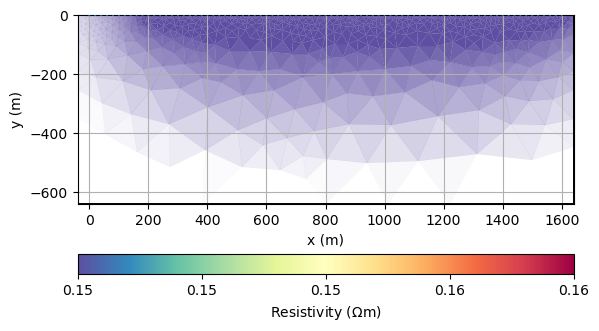

In [57]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr.showResult(**kw)
ax.grid(True)
#ax.set_ylim([-10, ax.get_ylim()[1]]) #esto es para que el eje 'y' empiece en -10

### Más control de calidad

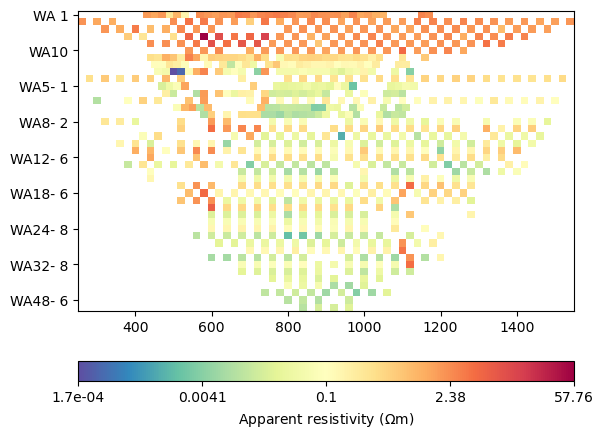

In [58]:
ax, cb = ert.show(data)

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

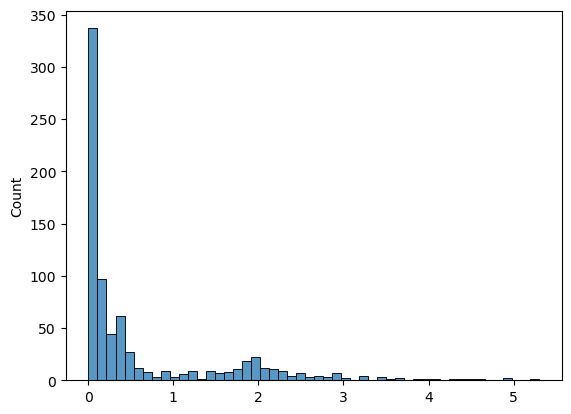

In [68]:
sns.histplot(data["rhoa"], bins = 50) #Disminuir el bin aumenta el grosor de cada barra del histograma

In [60]:
quantile_1 = data_series.quantile(0.01)
quantile_1

0.0037025554378147868

In [62]:
data.remove(data["rhoa"] < quantile_1)

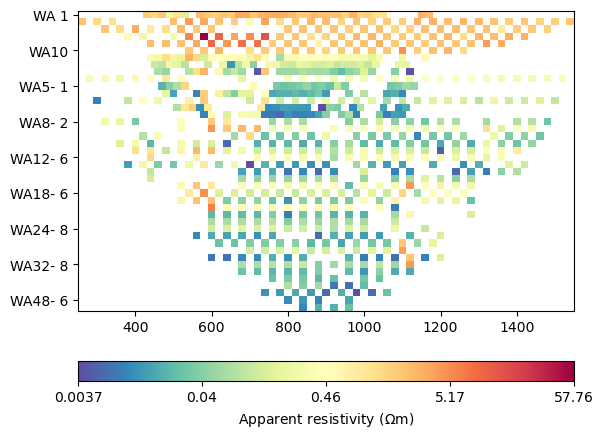

In [63]:
ax, cb = ert.show(data)

In [65]:
data.remove(data["rhoa"] > quantile_99) # Eliminamos valores outliers para que la inversión sea más precisa

In [66]:
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)

In [69]:
data.save('datos_2_qc_1.dat')

1

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

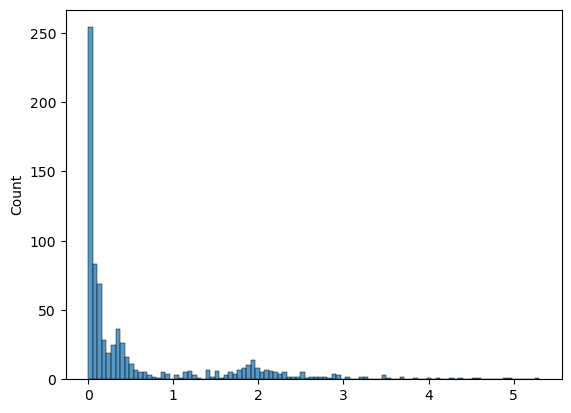

In [70]:
sns.histplot(data["rhoa"], bins = 100)

In [71]:
mgr = ert.ERTManager(data, verbose=True)

In [72]:
inv = mgr.invert(verbose=True, lam = 30) #Aumentamos el parámetro de regularización (lam) para que la inversión sea más suave

15/02/24 - 12:25:27 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 12:25:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


15/02/24 - 12:25:27 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 12:25:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 12:25:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/02/24 - 12:25:27 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/02/24 - 12:25:27 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3412 Cells: 6412 Boundaries: 5014
15/02/24 - 12:25:27 - pyGIMLi - INFO - Use median(data values)=0.14558140356735103
15/02/24 - 12:25:27 - pyGIMLi - INFO - Created startmodel from forward operator: 1275, min/max=0.145581/0.145581
15/02/24 - 12:25:27 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001DC7FC15E00>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001DC7FBFA9A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001DC7FC15590>
min/max (data): 0.0037/5.3
min/max (error): 2%/2.13%
min/max (start model): 0.15/0.15
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 8140.94
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 8023.29 (dPhi = 1.44%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 7660.42 (dPhi = 4.37%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 7436.15 (dPhi = 2.74%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 7292.97 (dPhi = 1.81%) lam: 30.0
################

(-250.0, 0.0)

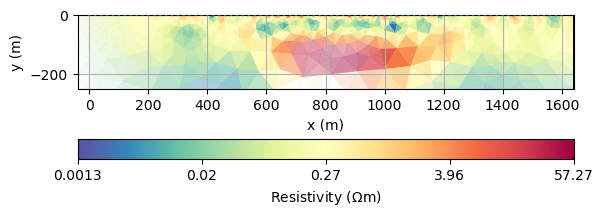

In [73]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr.showResult(**kw)
ax.grid(True)
ax.set_ylim([-250, ax.get_ylim()[1]]) #esto es para que el eje 'y' empiece en -250

Ambiente Costero, lo más alto resistivamente es arenisca 